<a href="https://colab.research.google.com/github/ersozbasak/Machine-Learning-Regression-Models/blob/master/4_KNN_kMeans_LSTM_comparison.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
%cd /content/drive/MyDrive/New_PJM_ML/kMeans
%ls

/content/drive/.shortcut-targets-by-id/1KIngltLQmHhYc3ztZl6sVXvAe_rP7VvU/New_PJM_ML/kMeans
 autokeras/
 clustering_comparison.csv
 dataset_km5_largest.pkl
 dataset_km5_others.pkl
 dataset.pkl
 history_lstm_all_0.708.pkl
 history_lstm_all_0.716.pkl
 history_lstm_all_0.756.pkl
 history_lstm_all_0.796.pkl
 history_lstm_all.pkl
 history_lstm_km5_largest_0.738.pkl
 history_lstm_km5_largest_0.748.pkl
 history_lstm_km5_largest_0.767.pkl
 history_lstm_km5_largest.pkl
 history_lstm_km5_others_0.574.pkl
 history_lstm_km5_others_0.592.pkl
 history_lstm_km5_others.pkl
 kMeans_5_3d_0.png
 kMeans_5_3d_11.png
 kMeans_5_3d_12.png
 kMeans_5_3d_13.png
 kMeans_5_3d_14.png
 kMeans_5_3d_1.png
 kMeans_5_3d_2.png
 kMeans_5_3d_3.png
 kMeans_5_3d_4.png
'kMeans_5_3d_random4_4_4_AEP-DAYTON HUB_CHICAGO HUB.svg'
'kMeans_5_3d_random4_4_4_AEP GEN HUB_ATSI GEN HUB.svg'
'kMeans_5_3d_random4_4_4_AEP GEN HUB_CHICAGO HUB.svg'
'kMeans_5_3d_random4_4_4_ATSI GEN HUB_DOMINION HUB.svg'
'kMeans_5_3d_random4_4_4_DOMINION HUB_N 

In [4]:
import pickle

# Load history from file
with open('history_lstm_all_0.708.pkl', 'rb') as file:
    history_lstm_all = pickle.load(file)

with open('history_lstm_km5_others_0.592.pkl', 'rb') as file:
    history_lstm_km5_others = pickle.load(file)

with open('history_lstm_km5_largest_0.767.pkl', 'rb') as file:
    history_lstm_km5_largest = pickle.load(file)

with open('model_lstm_all_0.708.pkl', 'rb') as file:
    model_lstm_all = pickle.load(file)

with open('model_lstm_km5_others_0.592.pkl', 'rb') as file:
    model_lstm_km5_others = pickle.load(file)

with open('model_lstm_km5_largest_0.767.pkl', 'rb') as file:
    model_lstm_km5_largest = pickle.load(file)

In [5]:
import pickle

# Load the dataset from the pickle file
with open('dataset.pkl', 'rb') as file:
    dataset = pickle.load(file)

# Access the training and test sets
X_train_all = dataset['X_train']
X_test_all = dataset['X_test']
y_train_all = dataset['y_train']
y_test_all = dataset['y_test']

with open('dataset_km5_others.pkl', 'rb') as file:
    dataset = pickle.load(file)

# Access the training and test sets
X_train_km5_others = dataset['X_train']
X_test_km5_others = dataset['X_test']
y_train_km5_others = dataset['y_train']
y_test_km5_others = dataset['y_test']

with open('dataset_km5_largest.pkl', 'rb') as file:
    dataset = pickle.load(file)

# Access the training and test sets
X_train_km5_largest = dataset['X_train']
X_test_km5_largest = dataset['X_test']
y_train_km5_largest = dataset['y_train']
y_test_km5_largest = dataset['y_test']

In [6]:
#import pickle

# Load history from file
#with open('history_lstm_all.pkl', 'rb') as file:
#    history_lstm_all = pickle.load(file)

#with open('history_lstm_km5_others.pkl', 'rb') as file:
#    history_lstm_km5_others = pickle.load(file)

#with open('history_lstm_km5_largest_0.767.pkl', 'rb') as file:
#    history_lstm_km5_largest = pickle.load(file)


In [7]:
def plot_train_history(history, title, ax):
    loss = history.history['loss']
    val_loss = history.history['val_loss']

    epochs = range(len(loss))

    ax.plot(epochs, loss, 'b', label='Training loss', linewidth=1, color='green')
    ax.plot(epochs, val_loss, 'r', label='Validation loss', linewidth=1, color='purple')
    ax.set_title(title)
    ax.legend()

In [10]:
# Create subplots
fig, axs = plt.subplots(1, 3, figsize=(12, 3))

# Plot each history variable
plot_train_history(history_lstm_all, 'Whole Data Set', axs[0])
plot_train_history(history_lstm_km5_others, 'k-Means, k=5 Others', axs[1])
plot_train_history(history_lstm_km5_largest, 'k-Means, k=5 Largest Cluster', axs[2])

# Adjust spacing between subplots
plt.tight_layout()

plt.savefig("kMeans_loss_comparison.svg", format="svg")

# Show the plot
plt.show()

NameError: ignored

In [11]:
# Make predictions
y_pred_lstm_all = model_lstm_all.predict(X_test_all)
y_pred_lstm_km5_others = model_lstm_km5_others.predict(X_test_km5_others)
y_pred_lstm_km5_largest = model_lstm_km5_largest.predict(X_test_km5_largest)


63/63 [==============================] - 0s 3ms/step


In [12]:

import matplotlib.pyplot as plt

def plot_predictions(y_pred, y_test, title, ax, hour, n_day):

    ax.set_xlabel('Time(hours)')
    ax.set_ylabel('LMP($/MWh)')
    ax.set_title(title)

    plot_day = hour*n_day

    ax.plot(y_pred[0:plot_day], label='Prediction', linestyle='dotted',color='green')
    ax.plot(y_test[0:plot_day], label='True', linewidth=1,color='purple')
    ax.legend()


In [13]:
#Grafiklerin hepsi fig size 6,3 olacak ve yan yana olmayacak.
#Data setler time kısmı 2000 e gitmeyecek. 30 günlük, 5 günlük, 1 günlük olacak. hepsi ayrı ayrı alt alta çizdirilecek. Başlıklarında kaç günlük olduklarına dair bilgi de bulunacak.

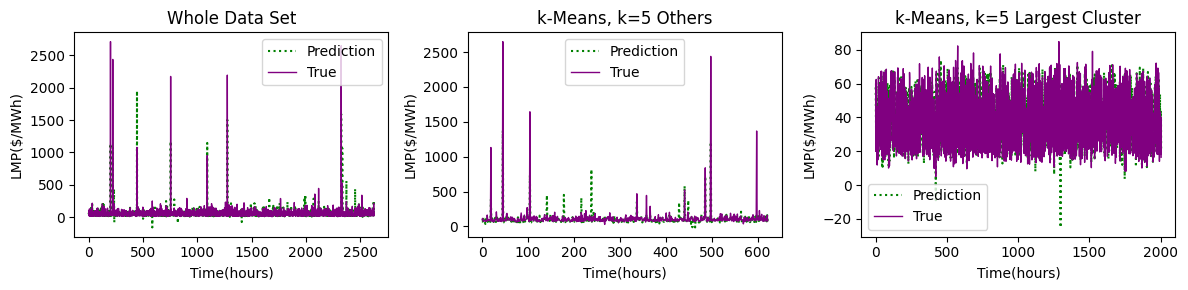

In [14]:
# Create subplots
fig, axs = plt.subplots(1, 3, figsize=(12, 3))


plot_predictions(y_pred_lstm_all, y_test_all, 'Whole Data Set', axs[0], 1, -1)
plot_predictions(y_pred_lstm_km5_others, y_test_km5_others, 'k-Means, k=5 Others', axs[1], 1, -1)
plot_predictions(y_pred_lstm_km5_largest, y_test_km5_largest,'k-Means, k=5 Largest Cluster', axs[2], 1, -1)

# Adjust spacing between subplots
plt.tight_layout()

plt.savefig("kMeans_prediction_-1_comparison.svg", format="svg")

# Show the plot
plt.show()

In [21]:

import matplotlib.pyplot as plt

def plot_predictions(y_pred, y_test, title, ax, hour, n_day):

    ax.set_xlabel('Zaman(saat)')
    ax.set_ylabel('LMP($/MWh)')
    ax.set_title(title)

    plot_day = hour*n_day

    ax.plot(y_pred[0:plot_day], label='Prediction', linestyle='dotted',color='green')
    ax.plot(y_test[0:plot_day], label='True', linewidth=1,color='purple')
    ax.legend()


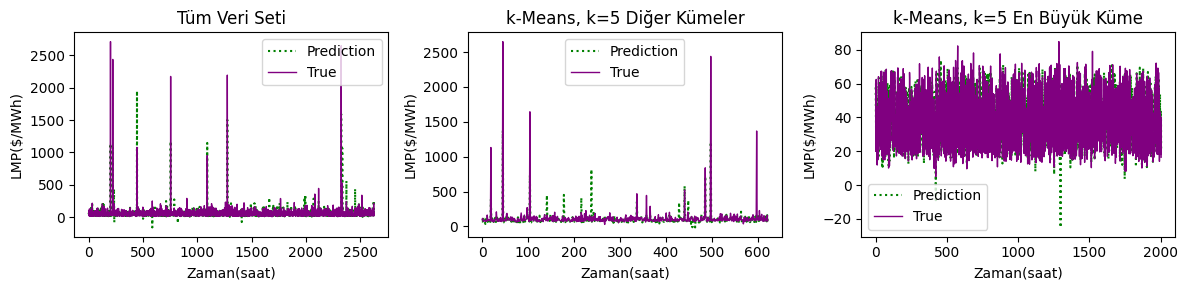

In [22]:
# Create subplots
fig, axs = plt.subplots(1, 3, figsize=(12, 3))


plot_predictions(y_pred_lstm_all, y_test_all, 'Tüm Veri Seti', axs[0], 1, -1)
plot_predictions(y_pred_lstm_km5_others, y_test_km5_others, 'k-Means, k=5 Diğer Kümeler', axs[1], 1, -1)
plot_predictions(y_pred_lstm_km5_largest, y_test_km5_largest,'k-Means, k=5 En Büyük Küme', axs[2], 1, -1)

# Adjust spacing between subplots
plt.tight_layout()

plt.savefig("kMeans_prediction_-1_comparison.svg", format="svg")

# Show the plot
plt.show()

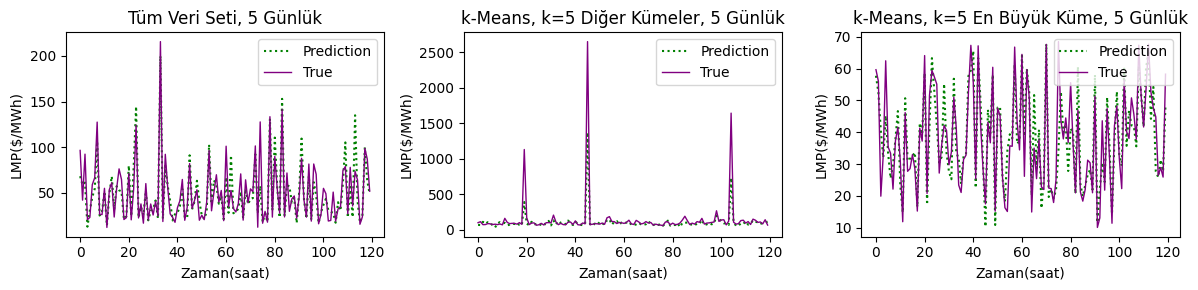

In [27]:
# Create subplots
fig, axs = plt.subplots(1, 3, figsize=(12, 3))

plot_predictions(y_pred_lstm_all, y_test_all, 'Tüm Veri Seti, 5 Günlük', axs[0], 24, 5)
plot_predictions(y_pred_lstm_km5_others, y_test_km5_others, 'k-Means, k=5 Diğer Kümeler, 5 Günlük', axs[1], 24, 5)
plot_predictions(y_pred_lstm_km5_largest, y_test_km5_largest,'k-Means, k=5 En Büyük Küme, 5 Günlük', axs[2], 24, 5)

# Adjust spacing between subplots
plt.tight_layout()

plt.savefig("kMeans_prediction_24h_5day_comparison.svg", format="svg")

# Show the plot
plt.show()

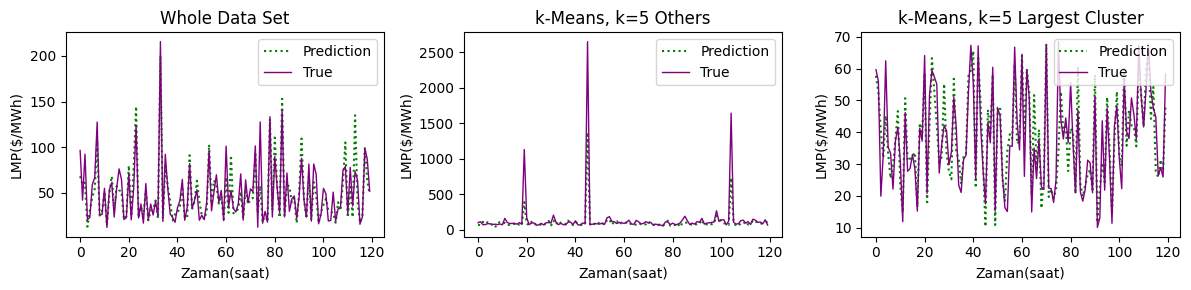

In [26]:
# Create subplots
fig, axs = plt.subplots(1, 3, figsize=(12, 3))

plot_predictions(y_pred_lstm_all, y_test_all, 'Whole Data Set', axs[0], 24, 5)
plot_predictions(y_pred_lstm_km5_others, y_test_km5_others, 'k-Means, k=5 Others', axs[1], 24, 5)
plot_predictions(y_pred_lstm_km5_largest, y_test_km5_largest,'k-Means, k=5 Largest Cluster', axs[2], 24, 5)

# Adjust spacing between subplots
plt.tight_layout()

plt.savefig("kMeans_prediction_24h_5day_comparison.svg", format="svg")

# Show the plot
plt.show()

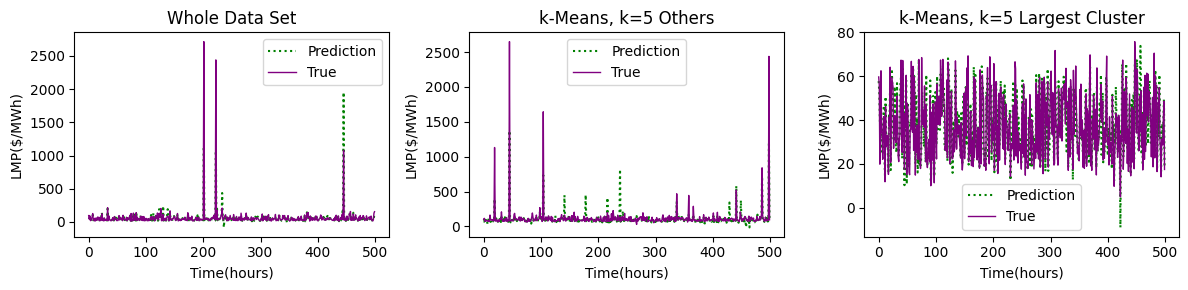

In [17]:
# Create subplots
fig, axs = plt.subplots(1, 3, figsize=(12, 3))

plot_predictions(y_pred_lstm_all, y_test_all, 'Whole Data Set', axs[0], 100, 5)
plot_predictions(y_pred_lstm_km5_others, y_test_km5_others, 'k-Means, k=5 Others', axs[1], 100, 5)
plot_predictions(y_pred_lstm_km5_largest, y_test_km5_largest,'k-Means, k=5 Largest Cluster', axs[2], 100, 5)

# Adjust spacing between subplots
plt.tight_layout()

plt.savefig("kMeans_prediction_500_comparison.svg", format="svg")

# Show the plot
plt.show()

In [18]:
import csv
from tabulate import tabulate
import numpy as np
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# Calculate errors for each model
errors_all = y_pred_lstm_all - y_test_all
errors_km5_others = y_pred_lstm_km5_others - y_test_km5_others
errors_km5_largest = y_pred_lstm_km5_largest - y_test_km5_largest

# Calculate metrics for each model
mse_all = mean_squared_error(y_test_all, y_pred_lstm_all)
rmse_all = np.sqrt(mse_all)
mae_all = mean_absolute_error(y_test_all, y_pred_lstm_all)

mse_km5_others = mean_squared_error(y_test_km5_others, y_pred_lstm_km5_others)
rmse_km5_others = np.sqrt(mse_km5_others)
mae_km5_others = mean_absolute_error(y_test_km5_others, y_pred_lstm_km5_others)

mse_km5_largest = mean_squared_error(y_test_km5_largest, y_pred_lstm_km5_largest)
rmse_km5_largest = np.sqrt(mse_km5_largest)
mae_km5_largest = mean_absolute_error(y_test_km5_largest, y_pred_lstm_km5_largest)

# Create a table
table = [
    ['Model', 'Mean Absolute Error', 'Root Mean Square Error', 'R2 Score'],
    ['Whole Data Set', '{:.2f}'.format(mae_all), '{:.2f}'.format(rmse_all), '{:.2f}'.format(r2_score(y_test_all, y_pred_lstm_all))],
    ['k-Means, k=5 Others', '{:.2f}'.format(mae_km5_others), '{:.2f}'.format(rmse_km5_others), '{:.2f}'.format(r2_score(y_test_km5_others, y_pred_lstm_km5_others))],
    ['k-Means, k=5 Largest Cluster', '{:.2f}'.format(mae_km5_largest), '{:.2f}'.format(rmse_km5_largest), '{:.2f}'.format(r2_score(y_test_km5_largest, y_pred_lstm_km5_largest))]
]

# Print the table
print(tabulate(table, headers='firstrow', tablefmt='fancy_grid'))

# Save the table to a CSV file
with open('metrics_table.csv', 'w', newline='') as file:
    writer = csv.writer(file)
    writer.writerows(table)


╒══════════════════════════════╤═══════════════════════╤══════════════════════════╤════════════╕
│ Model                        │   Mean Absolute Error │   Root Mean Square Error │   R2 Score │
╞══════════════════════════════╪═══════════════════════╪══════════════════════════╪════════════╡
│ Whole Data Set               │                 16.66 │                    61.49 │       0.71 │
├──────────────────────────────┼───────────────────────┼──────────────────────────┼────────────┤
│ k-Means, k=5 Others          │                 35.36 │                   109.42 │       0.59 │
├──────────────────────────────┼───────────────────────┼──────────────────────────┼────────────┤
│ k-Means, k=5 Largest Cluster │                  5.25 │                     7.48 │       0.77 │
╘══════════════════════════════╧═══════════════════════╧══════════════════════════╧════════════╛
